In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import clear_output
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn  import tree 
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

import tensorflow as tf
mnist = tf.keras.datasets.mnist 
(x_train,y_train), (x_test, y_test) = mnist.load_data()


mnist.head()

In [25]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

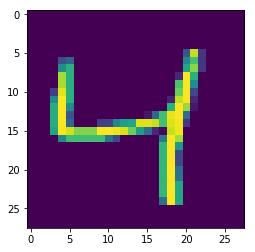

In [26]:
plt.imshow(x_train[2])
plt.show()

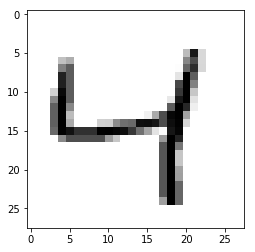

In [27]:
plt.imshow(x_train[2], cmap = plt.cm.binary)
plt.show()

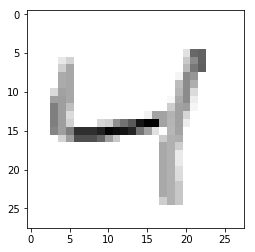

In [28]:
#normalized the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[2], cmap = plt.cm.binary)
plt.show()

In [29]:
print(x_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [30]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2644 - accuracy: 0.9228
Epoch 2/3
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1098 - accuracy: 0.9663s - loss:
Epoch 3/3
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0723 - accuracy: 0.9766


In [31]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)


10000/10000 [==============================] - 1s 81us/sample - loss: 0.0894 - accuracy: 0.9722
0.0894160328543745 0.9722


In [32]:
print(x_test[5])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [33]:
#model.save('epic_num_reader.model')


In [34]:
#new_model = tf.keras.models.load_model('epic_num_reader.model')

In [35]:
predictions = model.predict([x_test])

1


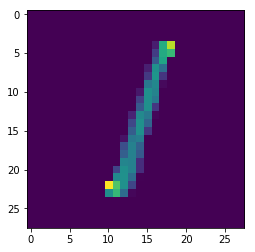

In [36]:
print(np.argmax(predictions[2]))
plt.imshow(x_test[2])
plt.show()

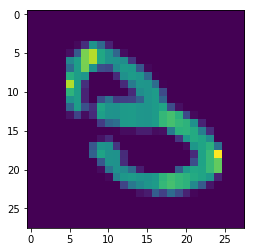

In [37]:

plt.imshow(x_test[18])
plt.show()

In [38]:
print(np.argmax(predictions[18]))

3


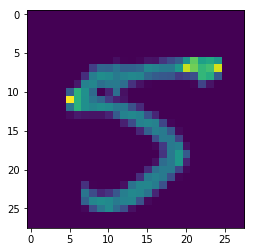

In [39]:
plt.imshow(x_test[102])
plt.show()

In [40]:
print(np.argmax(predictions[102]))

5


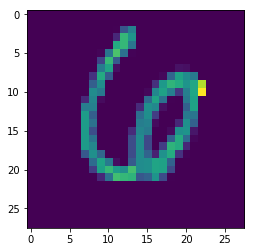

In [41]:

plt.imshow(x_test[66])
plt.show()

In [42]:
print(np.argmax(predictions[66]))

6


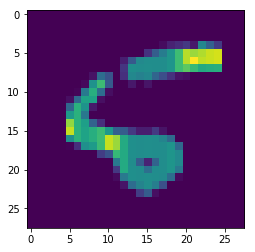

In [43]:
plt.imshow(x_test[8])
plt.show()

In [44]:
print(np.argmax(predictions[8]))

5


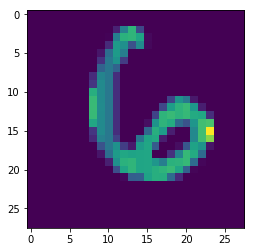

6


In [45]:
plt.imshow(x_test[88])
plt.show()
print(np.argmax(predictions[88]))

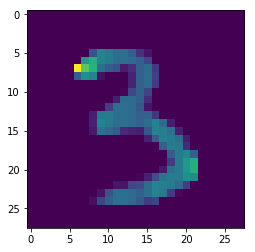

3


In [46]:
plt.imshow(x_test[32])
plt.show()
print(np.argmax(predictions[32]))

In [ ]:
X_train_sample = X_train.sample()